## Studying Los Angeles Geographic Regions and Correlations to Coronavius Cases


## Background
Covid 19 has numbers has greatly impacted the United States, effecting both general poplation health andcountry economic health. I am going to be looking at the county of Los Angeles in California, to see which people/areas seem to be at higher risk of contracting covid 19. 

Demographic wise, I will be observing the effect of race and income levels on Covid 19 in different cities within Los Angeles. I would also like to see if there is a correlation between the most common type of businesses in certain neighborhoods and the amount of Covid 19 cases, to possibly highlight businesses that should be marked as high risk.

Problem
Due to the infectious nature of Covid 19, the state of California ordered a mandatory stay at home order in March of 2020. The stay at home order required that residents stay inside their home, unless they were visiting essential businesses. Along, with the stay at home order, businesses that were not deemed mandatory were forced to temporarily close. In June of 2020, non essential businesses were allowed to open with strict preventive health measures. As Covid 19 cases increased Governor Gavin Newsom ordered the reclosing of many large cities in California. Although, fully quarantining will slow the spread of Covid 19, the capatalistic backbone of this country will most likely force legislators to allow the reopening of businesses in certain areas. Hopefully, this data will help guide which areas are most at risk to guide the proper reallocation of resources and help to create better reopening guidelines.

Interest
This information would be interesting to have for legislative officials to consider when writing their stay at home legislation. It may also be interesting for small businesses who feel they must remain open, in order to avoid going bankrupt.

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import requests
from bs4 import BeautifulSoup
import json
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0
print('Libraries imported.')
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

### Data Aquisition & Cleaning

#### Data Sources

Location Data, Income Levels, Ethnic Breakdowns, and Covid Count all aquired from LA Times Data Dashboard.

Popular Attraction/ Venue Data will be Extracted from Foursquare API for the communities collected from the data above in LA.

Geopy data will be used to help gain the latitude and longitude of each zipcode center to be later mapped.

## Data Uploading

#### Cases per City in LA County

In [376]:
file_name='https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv'
Cases=pd.read_csv(file_name)
print(Cases.size)
Cases.head()


786904


,date,county,fips,place,confirmed_cases,note,x,y
0,2020-08-08,Placer,61.0,East Placer,100,NaN,-120.200398,39.205550
1,2020-08-08,Placer,61.0,Mid Placer,224,NaN,-120.763323,39.064633
2,2020-08-08,Placer,61.0,South Placer,1758,NaN,-121.302209,38.881984
3,2020-08-07,Alameda,1.0,Address Unknown,86,NaN,NaN,NaN
4,2020-08-07,Alameda,1.0,Alameda,196,NaN,-122.274444,37.756111


#### City Geographic Data

In [377]:
# The code was removed by Watson Studio for sharing.

,the_geom,set,slug,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,Neighborho,Region,Descriptio,Source_Lin
0,MULTIPOLYGON (((-118.20261747920541 34.5389897...,L.A. County Neighborhoods (Current),acton,L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.339109,unincorporated-area,NaN,NaN,Acton,Antelope Valley,Acton is an unincorporated area in the Antelop...,http://maps.latimes.com/neighborhoods/neighbor...
1,MULTIPOLYGON (((-118.30900800000012 34.0374109...,L.A. County Neighborhoods (Current),adams-normandie,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350,segment-of-a-city,NaN,NaN,Adams-Normandie,South L.A.,Adams-Normandie is a neighborhood in the city ...,http://maps.latimes.com/neighborhoods/neighbor...
2,MULTIPOLYGON (((-118.76192500000009 34.1682029...,L.A. County Neighborhoods (Current),agoura-hills,L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.146760,standalone-city,NaN,NaN,Agoura Hills,Santa Monica Mountains,Agoura Hills is a city in the Santa Monica Mou...,http://maps.latimes.com/neighborhoods/neighbor...
3,MULTIPOLYGON (((-118.2546773959221 34.55830403...,L.A. County Neighborhoods (Current),agua-dulce,L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.462632,unincorporated-area,NaN,NaN,Agua Dulce,Northwest County,Agua Dulce is an unincorporated area in the No...,http://maps.latimes.com/neighborhoods/neighbor...
4,MULTIPOLYGON (((-118.12174700000014 34.1050399...,L.A. County Neighborhoods (Current),alhambra,L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.623814,standalone-city,NaN,NaN,Alhambra,San Gabriel Valley,Alhambra is a city in the San Gabriel Valley r...,http://maps.latimes.com/neighborhoods/neighbor...


In [378]:

body = client_ba8864d5cce748d19350bc7643d4841a.get_object(Bucket='datasciencecapstone-donotdelete-pr-roicldaox39jf3',Key='population density - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pop = pd.read_csv(body)
pop.head()


,place,population
0,Koreatown,"42,611"
1,Westlake,"38,214"
2,East Hollywood,"31,095"
3,Pico-Union,"25,352"
4,Maywood,"23,638"


In [379]:

body = client_ba8864d5cce748d19350bc7643d4841a.get_object(Bucket='datasciencecapstone-donotdelete-pr-roicldaox39jf3',Key='Square Mileage of LA - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

sq = pd.read_csv(body)
sq.head()


,place,square_miles
0,Northeast Antelope Valley,442.0
1,Angeles Crest,430.5
2,Ridge Route,292.7
3,Tujunga Canyons,229.9
4,Northwest Antelope Valley,213.9


#### Median Income by City

In [380]:

body = client_ba8864d5cce748d19350bc7643d4841a.get_object(Bucket='datasciencecapstone-donotdelete-pr-roicldaox39jf3',Key='LA_Median_Income - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

laIncome = pd.read_csv(body)
laIncome.head()


,RANK,NEIGHBORHOOD,MEDIAN INCOME
0,1,Bel-Air,"$207,938"
1,2,Hidden Hills,"$203,199"
2,3,Rolling Hills,"$184,777"
3,4,Beverly Crest,"$169,282"
4,5,Pacific Palisades,"$168,008"


#### Ethnicity Data

In [381]:

body = client_ba8864d5cce748d19350bc7643d4841a.get_object(Bucket='datasciencecapstone-donotdelete-pr-roicldaox39jf3',Key='Latino - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

latino = pd.read_csv(body)
latino.head()


,index,place,percent
0,1,East Los Angeles,96.70%
1,2,Maywood,96.40%
2,3,Walnut Park,95.40%
3,4,Huntington Park,95.10%
4,5,Boyle Heights,94.00%


In [382]:

body = client_ba8864d5cce748d19350bc7643d4841a.get_object(Bucket='datasciencecapstone-donotdelete-pr-roicldaox39jf3',Key='Asian - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

asian = pd.read_csv(body)
asian.head()


,index,place,percent
0,1,Chinatown,70.60%
1,2,Monterey Park,61.10%
2,3,Cerritos,58.30%
3,4,Walnut,56.20%
4,5,Rowland Heights,51.70%


In [383]:

body = client_ba8864d5cce748d19350bc7643d4841a.get_object(Bucket='datasciencecapstone-donotdelete-pr-roicldaox39jf3',Key='Black - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

black = pd.read_csv(body)
black.head()


,Index,place,percent
0,1,View Park-Windsor Hills,86.50%
1,2,Gramercy Park,86.40%
2,3,Leimert Park,79.60%
3,4,Manchester Square,78.60%
4,5,Baldwin Hills/Crenshaw,71.30%


In [384]:

body = client_ba8864d5cce748d19350bc7643d4841a.get_object(Bucket='datasciencecapstone-donotdelete-pr-roicldaox39jf3',Key='PercentWhite - Sheet1 (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

white = pd.read_csv(body)
white.head()



,index,place,percent
0,1,Malibu,88.80%
1,2,Hidden Hills,88.70%
2,3,Pacific Palisades,88.60%
3,4,Topanga,87.60%
4,5,Beverly Crest,87.50%


#### General California Data

In [385]:
file_name='https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-race-ethnicity.csv'
genCA=pd.read_csv(file_name)
genCA.head()

,date,race,age,confirmed_cases_total,confirmed_cases_percent,deaths_total,deaths_percent,population_percent
0,2020-08-06,asian,0-17,891,0.026,0,0.000,0.130
1,2020-08-06,asian,18+,20147,0.063,1231,0.128,0.165
2,2020-08-06,asian,18-34,5521,0.047,10,0.073,0.151
3,2020-08-06,asian,35-49,5363,0.061,36,0.065,0.179
4,2020-08-06,asian,50-64,4998,0.072,135,0.078,0.167


## Data Cleansing

#### Filtering to only Covid Cases LA, averaging lat and long of neighborhoods, summing cases per neighborhood, then normalizing case data

In [386]:
pop['population'] = pop['population'].str.replace(',', '')
pop['population'] = pop['population'].astype(int)


In [387]:
Cases.drop(axis=1, columns=['date','fips','note'], inplace = True)

In [388]:
laCases = Cases.loc[Cases['county']=="Los Angeles"]
laCases.head()

,county,place,confirmed_cases,x,y
174,Los Angeles,Acton,51,-118.216138,34.481366
175,Los Angeles,Adams-Normandie,188,-118.302397,34.029122
176,Los Angeles,Agoura Hills,122,-118.760876,34.151007
177,Los Angeles,Agua Dulce,20,-118.323810,34.497963
178,Los Angeles,Alhambra,981,-118.135504,34.083961


In [389]:
laCases = pd.merge(laCases,pop)
laCases = pd.merge(laCases,sq)
laCases.head()

,county,place,confirmed_cases,x,y,population,square_miles
0,Los Angeles,Acton,51,-118.216138,34.481366,166,39.3
1,Los Angeles,Acton,50,-118.216138,34.481366,166,39.3
2,Los Angeles,Acton,46,-118.216138,34.481366,166,39.3
3,Los Angeles,Acton,45,-118.216138,34.481366,166,39.3
4,Los Angeles,Acton,45,-118.216138,34.481366,166,39.3


In [390]:
city = laCases.groupby("place", as_index=False)["confirmed_cases"].sum()

In [391]:
location = laCases.groupby("place", as_index=False)["x", "y","population","square_miles"].mean()
location = location.rename(columns={'x': 'Long', 'y' : 'Lat'})

In [392]:
laCovid = pd.merge(city,location)
print(laCovid.size)
laCovid.head()

1266


,place,confirmed_cases,Long,Lat,population,square_miles
0,Acton,2265,-118.216138,34.481366,166,39.3
1,Adams-Normandie,9024,-118.302397,34.029122,21848,0.8
2,Agoura Hills,6246,-118.760876,34.151007,2495,8.1
3,Agua Dulce,1044,-118.323810,34.497963,99,31.5
4,Alhambra,41016,-118.135504,34.083961,11275,7.6


In [393]:
popTot = laCovid["population"] * laCovid["square_miles"] * 11.3616566544 #increase rate from 2010 to 2020

casesPop = laCovid["confirmed_cases"]/popTot

casesPop = casesPop*100
casesPop = casesPop.astype(int)

laCovid = laCovid.drop(columns = ["confirmed_cases","population" ,"square_miles"])

laCovid.insert(1, "confirmed_cases", casesPop, True)

#### Dropping unnecesary columns and filtering to only standalone cities for city geographic data

In [394]:
LANeighborhood.drop(axis=1, columns=['the_geom', 'set', 'slug', 'kind', 'external_i', 'display_na',
       'sqmi', 'name_1', 'slug_1', 'Neighborho', 'Region',
       'Descriptio', 'Source_Lin'], inplace = True)
LANeighborhood.dropna
LANeighborhood.head()

,name,type
0,Acton,unincorporated-area
1,Adams-Normandie,segment-of-a-city
2,Agoura Hills,standalone-city
3,Agua Dulce,unincorporated-area
4,Alhambra,standalone-city


In [395]:
Neighborhood = LANeighborhood.loc[LANeighborhood['type']=="standalone-city"]

In [396]:
Neighborhood = Neighborhood.drop_duplicates('name')
Neighborhood = Neighborhood.rename(columns={'name': 'place'})
print(Neighborhood.size)
Neighborhood.head()

174


,place,type
2,Agoura Hills,standalone-city
4,Alhambra,standalone-city
8,Arcadia,standalone-city
11,Artesia,standalone-city
14,Avalon,standalone-city


#### Merge Cases and Geographic data

In [397]:
neighborhoodFilter = Neighborhood.merge(laCovid, on='place')
print(neighborhoodFilter.size)
neighborhoodFilter.head()

430


,place,type,confirmed_cases,Long,Lat
0,Agoura Hills,standalone-city,2,-118.760876,34.151007
1,Alhambra,standalone-city,4,-118.135504,34.083961
2,Arcadia,standalone-city,2,-118.037297,34.134186
3,Artesia,standalone-city,5,-118.080630,33.867577
4,Avalon,standalone-city,0,-118.331354,33.333921


#### Clean Income Data

In [398]:
laIncome.columns

Index(['RANK', 'NEIGHBORHOOD', 'MEDIAN INCOME'], dtype='object')

In [399]:
laIncome = laIncome.drop(axis =1 , columns= ['RANK'])

In [400]:
laIncome = laIncome.rename(columns = {'NEIGHBORHOOD':'place', 'MEDIAN INCOME':'Income'})
laIncome['Income'] = laIncome['Income'].str.replace(',', '')
laIncome['Income'] = laIncome['Income'].str.replace('$', '')
laIncome['Income'] = laIncome['Income'].astype(int)

#### Clean Ethnicty Data

In [401]:
asian['percent'] = asian['percent'].str.replace('%', '')
black['percent'] = black['percent'].str.replace('%', '')
latino['percent'] = latino['percent'].str.replace('%', '')
white['percent'] = white['percent'].str.replace('%', '')
white['percent'] = pd.to_numeric(white['percent'], errors='coerce').fillna(0).astype(int)
black['percent'] = pd.to_numeric(black['percent'], errors='coerce').fillna(0).astype(int)
asian['percent'] = pd.to_numeric(asian['percent'], errors='coerce').fillna(0).astype(int)
latino['percent'] = pd.to_numeric(latino['percent'], errors='coerce').fillna(0).astype(int)

#### Clean general data

In [402]:
genCA.drop(columns = ['date', 'age', 'deaths_total', 'deaths_percent',
       'confirmed_cases_percent','population_percent'])

,race,confirmed_cases_total
0,asian,891
1,asian,20147
2,asian,5521
3,asian,5363
4,asian,4998
5,asian,2565
6,asian,1700
7,asian,21051
8,black,812
9,black,14147


In [403]:
genCA = genCA.groupby("race", as_index=False)["confirmed_cases_total"].sum()

## Data Processing

In [270]:
# The code was removed by Watson Studio for sharing.

### Find the 500 most popular venues near the centroid lattitude/ longitude for each place

In [271]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['place', 
                  'Lat', 
                  'Long', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [272]:
topVenues = getNearbyVenues(names=neighborhoodFilter['place'],
                                   latitudes=neighborhoodFilter['Lat'],
                                   longitudes=neighborhoodFilter['Long']
                                  )

In [305]:
laOnehot = pd.get_dummies(topVenues[['Venue Category']], prefix="", prefix_sep="")

# add place column back to dataframe
laOnehot['place'] = topVenues['place'] 

# move place column to the first column
fixedColumns = [laOnehot.columns[-1]] + list(laOnehot.columns[:-1])
laOnehot = laOnehot[fixedColumns]

laOnehot.head()

,place,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Agoura Hills,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agoura Hills,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agoura Hills,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agoura Hills,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agoura Hills,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
laVenues = laOnehot.groupby('place').mean().reset_index()
laVenues.dropna

<bound method DataFrame.dropna of                    place       ATM  Accessories Store  American Restaurant  \
0           Agoura Hills  0.050000               0.00             0.000000   
1               Alhambra  0.000000               0.00             0.000000   
2                Arcadia  0.000000               0.00             0.000000   
3                Artesia  0.000000               0.00             0.000000   
4                 Avalon  0.000000               0.00             0.000000   
5                  Azusa  0.000000               0.00             0.000000   
6           Baldwin Park  0.000000               0.00             0.000000   
7                   Bell  0.000000               0.00             0.000000   
8           Bell Gardens  0.076923               0.00             0.000000   
9             Bellflower  0.000000               0.00             0.000000   
10         Beverly Hills  0.000000               0.00             0.000000   
11              Bradbury  0.00

### Show the top 3 most frequent venue type for each neighborhood

In [307]:
numTopVenues = 3

for hood in laVenues['place']:
    print("--"+hood+"--")
    temp = laVenues[laVenues['place'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(numTopVenues))
    print('\n')

--Agoura Hills--
                  venue  freq
0  Fast Food Restaurant  0.10
1                   ATM  0.05
2         Deli / Bodega  0.05


--Alhambra--
               venue  freq
0  Convenience Store  0.31
1     Breakfast Spot  0.08
2        Video Store  0.08


--Arcadia--
              venue  freq
0           Theater  0.25
1  Football Stadium  0.25
2    Baseball Field  0.25


--Artesia--
                  venue  freq
0     Indian Restaurant  0.17
1    Chinese Restaurant  0.13
2  Fast Food Restaurant  0.07


--Avalon--
                venue  freq
0                Park   0.5
1  Athletics & Sports   0.5
2                 ATM   0.0


--Azusa--
           venue  freq
0       Pharmacy   0.2
1  Big Box Store   0.2
2           Park   0.2


--Baldwin Park--
                venue  freq
0  Mexican Restaurant  0.12
1        Liquor Store  0.12
2        Home Service  0.06


--Bell--
                venue  freq
0        Burger Joint   0.2
1  Mexican Restaurant   0.2
2         Pizza Place   0.2


--B

In [308]:
def mostCommonVenues(row, numTopVenues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:numTopVenues]

### Create a dataframe of most popular venues

In [326]:
numTopVenues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['place']
for ind in np.arange(numTopVenues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
placeVenuesSorted = pd.DataFrame(columns=columns)
placeVenuesSorted['place'] = laVenues['place']

for ind in np.arange(laVenues.shape[0]):
    placeVenuesSorted.iloc[ind, 1:] = mostCommonVenues(laVenues.iloc[ind, :], numTopVenues)

placeVenuesSorted.head()

,place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agoura Hills,Fast Food Restaurant,ATM,Construction & Landscaping
1,Alhambra,Convenience Store,Sporting Goods Shop,Video Store
2,Arcadia,Football Stadium,Baseball Field,Theater
3,Artesia,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant
4,Avalon,Park,Athletics & Sports,Yoga Studio


### Cluster Neighborhoods by top 3 venues similarity

In [327]:
# set number of clusters
kclusters = 7

laVenueClustering = laVenues.drop('place', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(laVenueClustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([6, 6, 6, 6, 2], dtype=int32)

In [328]:
placeVenuesSorted.insert(0, 'Cluster Labels', kmeans.labels_)

laData = neighborhoodFilter

# merge to add latitude/longitude for each place
laData = laData.join(placeVenuesSorted.set_index('place'), on='place')

laData.head() 

,place,type,confirmed_cases,Long,Lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agoura Hills,standalone-city,2,-118.760876,34.151007,6.0,Fast Food Restaurant,ATM,Construction & Landscaping
1,Alhambra,standalone-city,4,-118.135504,34.083961,6.0,Convenience Store,Sporting Goods Shop,Video Store
2,Arcadia,standalone-city,2,-118.037297,34.134186,6.0,Football Stadium,Baseball Field,Theater
3,Artesia,standalone-city,5,-118.080630,33.867577,6.0,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant
4,Avalon,standalone-city,0,-118.331354,33.333921,2.0,Park,Athletics & Sports,Yoga Studio


In [329]:
nan_value = float("NaN")
laData.replace("", nan_value, inplace=True)

laData.dropna(subset = ["Cluster Labels"], inplace=True)

laData["Cluster Labels"] = laData["Cluster Labels"].astype(int)

laData.head()


,place,type,confirmed_cases,Long,Lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agoura Hills,standalone-city,2,-118.760876,34.151007,6,Fast Food Restaurant,ATM,Construction & Landscaping
1,Alhambra,standalone-city,4,-118.135504,34.083961,6,Convenience Store,Sporting Goods Shop,Video Store
2,Arcadia,standalone-city,2,-118.037297,34.134186,6,Football Stadium,Baseball Field,Theater
3,Artesia,standalone-city,5,-118.080630,33.867577,6,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant
4,Avalon,standalone-city,0,-118.331354,33.333921,2,Park,Athletics & Sports,Yoga Studio


## Map of Clusters of Venue Type

In [330]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of LA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of LA are 34.0536909, -118.2427666.


In [331]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(laData['Lat'], laData['Long'], laData['place'], laData['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Exploring Clusters

In [332]:
laData.loc[laData['Cluster Labels'] == 0, laData.columns[[0,2] + list(range(5, laData.shape[1]))]]

,place,confirmed_cases,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
9,Bell,13,0,Market,Burger Joint,Mexican Restaurant
53,Monterey Park,4,0,Record Shop,Mexican Restaurant,Business Service
60,Pomona,8,0,Mexican Restaurant,Gas Station,Seafood Restaurant
67,San Fernando,11,0,Mexican Restaurant,Pizza Place,Bakery
75,South El Monte,9,0,Mexican Restaurant,Yoga Studio,Fish & Chips Shop
78,Temple City,5,0,Indonesian Restaurant,Mexican Restaurant,Yoga Studio
82,West Covina,7,0,Mexican Restaurant,Sports Bar,Juice Bar


In [333]:
laData.loc[laData['Cluster Labels'] == 1, laData.columns[[0,2] + list(range(5, laData.shape[1]))]]

,place,confirmed_cases,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
10,Bradbury,3,1,Stables,Yoga Studio,Financial or Legal Service


In [334]:
laData.loc[laData['Cluster Labels'] == 2, laData.columns[[0,2] + list(range(5, laData.shape[1]))]]

,place,confirmed_cases,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
4,Avalon,0,2,Park,Athletics & Sports,Yoga Studio
5,Azusa,8,2,Liquor Store,Big Box Store,Pizza Place
13,Calabasas,4,2,Bagel Shop,Tennis Court,Yoga Studio
29,Glendora,6,2,Baseball Field,Park,Yoga Studio
40,La Mirada,5,2,Park,Disc Golf,Water Park
43,La Verne,3,2,Park,Yoga Studio,Fish & Chips Shop
48,Lynwood,14,2,Mobile Phone Shop,Park,Gym


In [335]:
laData.loc[laData['Cluster Labels'] == 3, laData.columns[[0,2] + list(range(5, laData.shape[1]))]]

,place,confirmed_cases,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
28,Glendale,6,3,Trail,Yoga Studio,Financial or Legal Service
51,Monrovia,6,3,Trail,Yoga Studio,Financial or Legal Service
62,Rancho Palos Verdes,2,3,Trail,Nature Preserve,Yoga Studio


In [336]:
laData.loc[laData['Cluster Labels'] == 4, laData.columns[[0,2] + list(range(5, laData.shape[1]))]]

,place,confirmed_cases,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
85,Whittier,7,4,Auto Workshop,Yoga Studio,Fish & Chips Shop


In [337]:
laData.loc[laData['Cluster Labels'] == 5, laData.columns[[0,2] + list(range(5, laData.shape[1]))]]

,place,confirmed_cases,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
56,Palos Verdes Estates,3,5,Summer Camp,Scenic Lookout,Financial or Legal Service


In [338]:
laData.loc[laData['Cluster Labels'] == 6, laData.columns[[0,2] + list(range(5, laData.shape[1]))]]

,place,confirmed_cases,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agoura Hills,2,6,Fast Food Restaurant,ATM,Construction & Landscaping
1,Alhambra,4,6,Convenience Store,Sporting Goods Shop,Video Store
2,Arcadia,2,6,Football Stadium,Baseball Field,Theater
3,Artesia,5,6,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant
6,Baldwin Park,9,6,Liquor Store,Mexican Restaurant,Cosmetics Shop
7,Bellflower,9,6,Thai Restaurant,Mexican Restaurant,Pizza Place
8,Bell Gardens,12,6,Mexican Restaurant,ATM,Grocery Store
11,Beverly Hills,7,6,Breakfast Spot,Fountain,Gluten-free Restaurant
12,Burbank,5,6,Pizza Place,Furniture / Home Store,Fast Food Restaurant
14,Carson,6,6,Ice Cream Shop,Vietnamese Restaurant,Gym / Fitness Center


### Exploring Venue Data

In [339]:
laData.sort_values(by=['confirmed_cases']).head(10)

,place,type,confirmed_cases,Long,Lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
4,Avalon,standalone-city,0,-118.331354,33.333921,2,Park,Athletics & Sports,Yoga Studio
64,Rolling Hills,standalone-city,0,-118.347168,33.760022,6,Business Service,Yoga Studio,Fish & Chips Shop
33,Hidden Hills,standalone-city,1,-118.661203,34.163749,6,Home Service,Business Service,Concert Hall
38,La Habra Heights,standalone-city,1,-117.950975,33.960250,6,Golf Course,Home Service,Yoga Studio
84,Westlake Village,standalone-city,1,-118.822005,34.136925,6,American Restaurant,Recreation Center,Italian Restaurant
0,Agoura Hills,standalone-city,2,-118.760876,34.151007,6,Fast Food Restaurant,ATM,Construction & Landscaping
62,Rancho Palos Verdes,standalone-city,2,-118.363522,33.755380,3,Trail,Nature Preserve,Yoga Studio
73,Sierra Madre,standalone-city,2,-118.050332,34.168709,6,Mountain,Dive Bar,Playground
2,Arcadia,standalone-city,2,-118.037297,34.134186,6,Football Stadium,Baseball Field,Theater
81,Walnut,standalone-city,2,-117.859319,34.033461,6,Farm,Yoga Studio,Fish & Chips Shop


In [341]:
laData.sort_values(by=['confirmed_cases']).tail(10)

,place,type,confirmed_cases,Long,Lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
57,Paramount,standalone-city,11,-118.165144,33.897650,6,Indie Movie Theater,Flea Market,Fish & Chips Shop
58,Pico Rivera,standalone-city,12,-118.088735,33.990124,6,Bubble Tea Shop,Department Store,Arcade
8,Bell Gardens,standalone-city,12,-118.155014,33.966323,6,Mexican Restaurant,ATM,Grocery Store
9,Bell,standalone-city,13,-118.179783,33.980058,0,Market,Burger Joint,Mexican Restaurant
76,South Gate,standalone-city,13,-118.192526,33.944713,6,Bank,Wings Joint,Mobile Phone Shop
48,Lynwood,standalone-city,14,-118.201664,33.923954,2,Mobile Phone Shop,Park,Gym
34,Huntington Park,standalone-city,14,-118.216706,33.979987,6,Fried Chicken Joint,Mexican Restaurant,Café
20,Cudahy,standalone-city,14,-118.183118,33.963116,6,Fast Food Restaurant,Liquor Store,Pizza Place
45,Maywood,standalone-city,15,-118.187662,33.988520,6,Mexican Restaurant,Pizza Place,Convenience Store
80,Vernon,standalone-city,69,-118.210583,34.001902,6,Furniture / Home Store,Home Service,Food Service


In [343]:
!wget --quiet http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-current.geojson -O LA.json
    

laGeo = r'LA.json'

thresholdScale = np.linspace(laData['confirmed_cases'].min(),
                              laData['confirmed_cases'].max(),
                              6, dtype=int)
thresholdScale = thresholdScale.tolist() 
thresholdScale[-1] = thresholdScale[-1] + 1 


laMap = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')

laMap.choropleth(
    geo_data=laGeo,
    data=laData,
    columns=['place', 'confirmed_cases'],
    key_on='feature.properties.name',
    threshold_scale=thresholdScale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Covid Cases/ Population Percentage',
    reset=True
)

# display map
laMap

## Income Data Analysis and Visualization

In [404]:
laIncomeData = laIncome.merge(neighborhoodFilter, on='place')

In [405]:
laIncomeData = laIncomeData.sort_values(by = ['Income'])

In [406]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

### Scatter plot of Income Levels and Total Cases

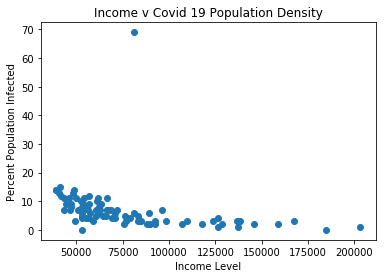

In [407]:
plt.scatter(laIncomeData['Income'], laIncomeData['confirmed_cases'])
plt.title('Income v Covid 19 Population Density')
plt.ylabel('Percent Population Infected')
plt.xlabel('Income Level')
plt.show()

In [421]:
laIncome = laIncomeData.sort_values(by=['confirmed_cases'],ascending=False)
laIncome = laIncome.drop(index=27)

In [422]:
laIncome[['Income', 'confirmed_cases']].corr()

,Income,confirmed_cases
Income,1.000000,-0.673545
confirmed_cases,-0.673545,1.000000


### Map of Income across LA

In [350]:
laGeo = r'LA.json'

thresholdScale = np.linspace(laIncomeData['Income'].min(),
                              laIncomeData['Income'].max(),
                              6, dtype=int)
thresholdScale = thresholdScale.tolist() 
thresholdScale[-1] = thresholdScale[-1] + 1 


laIncomeMap = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')

laIncomeMap.choropleth(
    geo_data=laGeo,
    data=laIncomeData,
    columns=['place', 'Income'],
    key_on='feature.properties.name',
    threshold_scale=thresholdScale,
    fill_color='YlGnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Income Levels',
    reset=True
)

# display map
laIncomeMap

In [424]:
incomeModel = laIncome._get_numeric_data()
y_data = incomeModel['confirmed_cases']
x_data=incomeModel.drop('confirmed_cases',axis=1)

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 17
number of training samples: 68


In [425]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Income']], y_train)

print(lre.score(x_test[['Income']], y_test))

print(lre.score(x_train[['Income']], y_train))

0.5386378904035056
0.42196236555526045


In [426]:
from sklearn.model_selection import cross_val_score

In [427]:
Rcross = cross_val_score(lre, x_data[['Income']], y_data, cv=4)

In [428]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -7.489012406063083 and the standard deviation is 4.712167833279258


Text(0.5, 1.0, 'R^2 Using Test Data')

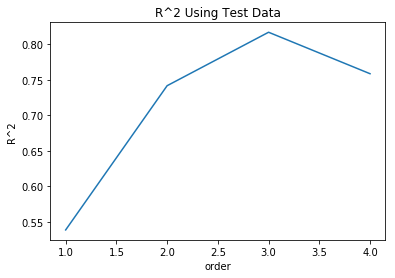

In [430]:
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Income']])
    
    x_test_pr = pr.fit_transform(x_test[['Income']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [432]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['Income']])
x_test_pr = pr.fit_transform(x_test[['Income']])
pr

poly = LinearRegression()
poly.fit(x_train_pr, y_train)
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test))

0.5372274817136579
0.8170706913942746


### Ethnic Data Analysis and Visulization

#### Merge Ethic Data with Total Cases

In [461]:
ethnicData = white.merge(asian, on='place')
ethnicData.head()


,index_x,place,percent_x,index_y,percent_y
0,1,Malibu,88,218,1
1,2,Hidden Hills,88,202,2
2,3,Pacific Palisades,88,160,5
3,4,Topanga,87,192,3
4,5,Beverly Crest,87,182,4


In [462]:
ethnicData = ethnicData.drop(columns=["index_x","index_y"])
ethnicData = ethnicData.rename(columns={"percent_x": "white", "percent_y": "asian"})
ethnicData.head()

,place,white,asian
0,Malibu,88,1
1,Hidden Hills,88,2
2,Pacific Palisades,88,5
3,Topanga,87,3
4,Beverly Crest,87,4


In [463]:
ethnicData = ethnicData.merge(black, on='place')
ethnicData.head()

,place,white,asian,Index,percent
0,Malibu,88,1,211,1
1,Hidden Hills,88,2,251,0
2,Pacific Palisades,88,5,253,0
3,Topanga,87,3,236,0
4,Beverly Crest,87,4,189,1


In [464]:
ethnicData = ethnicData.drop(columns=["Index"])
ethnicData = ethnicData.rename(columns={"percent": "black"})

In [465]:
ethnicData = ethnicData.merge(latino, on='place')
ethnicData.head()

,place,white,asian,black,index,percent
0,Malibu,88,1,1,247,5
1,Hidden Hills,88,2,0,239,6
2,Pacific Palisades,88,5,0,263,3
3,Topanga,87,3,0,257,4
4,Beverly Crest,87,4,1,261,3


In [466]:
ethnicData = ethnicData.drop(columns=["index"])
ethnicData = ethnicData.rename(columns={"percent": "latino"})
ethnicData.dropna
ethnicData.head()

,place,white,asian,black,latino
0,Malibu,88,1,1,5
1,Hidden Hills,88,2,0,6
2,Pacific Palisades,88,5,0,3
3,Topanga,87,3,0,4
4,Beverly Crest,87,4,1,3


In [467]:
ethnicData = ethnicData.merge(neighborhoodFilter, on='place')

In [468]:
ethnicData.dropna
ethnicData.head()
ethnicData = ethnicData.sort_values(by=['confirmed_cases'],ascending=False)
ethnicData = ethnicData.drop(index=84)

### Visual Mapping of Ethnicity in LA

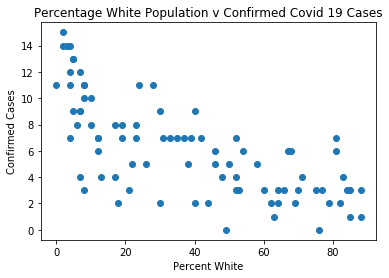

,white,confirmed_cases
white,1.000000,-0.706921
confirmed_cases,-0.706921,1.000000


In [474]:
plt.scatter(ethnicData['white'], ethnicData['confirmed_cases'])
plt.title('Percentage White Population v Confirmed Covid 19 Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Percent White')
plt.show()
ethnicData[['white', 'confirmed_cases']].corr()

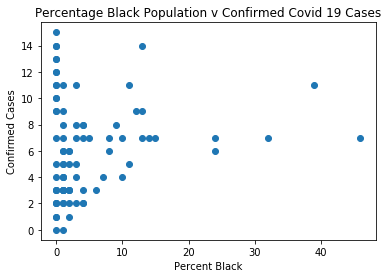

,black,confirmed_cases
black,1.0000,0.1555
confirmed_cases,0.1555,1.0000


In [471]:
plt.scatter(ethnicData['black'], ethnicData['confirmed_cases'])
plt.title('Percentage Black Population v Confirmed Covid 19 Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Percent Black')
plt.show()
ethnicData[['black', 'confirmed_cases']].corr()

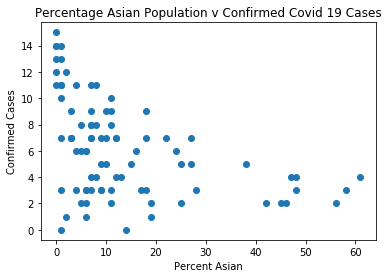

,asian,confirmed_cases
asian,1.000000,-0.447976
confirmed_cases,-0.447976,1.000000


In [472]:
plt.scatter(ethnicData['asian'], ethnicData['confirmed_cases'])
plt.title('Percentage Asian Population v Confirmed Covid 19 Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Percent Asian')
plt.show()
ethnicData[['asian', 'confirmed_cases']].corr()

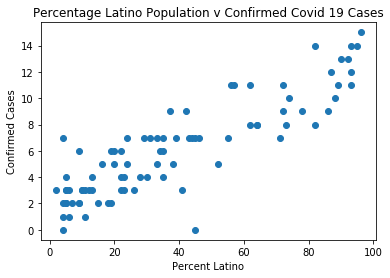

,latino,confirmed_cases
latino,1.000000,0.873176
confirmed_cases,0.873176,1.000000


In [473]:
plt.scatter(ethnicData['latino'], ethnicData['confirmed_cases'])
plt.title('Percentage Latino Population v Confirmed Covid 19 Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Percent Latino')
plt.show()
ethnicData[['latino', 'confirmed_cases']].corr()

In [491]:
ethnicModel = ethnicData._get_numeric_data()
y_data = ethnicModel['confirmed_cases']
x_data=ethnicModel.drop('confirmed_cases',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 22
number of training samples: 63


In [492]:
lre=LinearRegression()
lre.fit(x_train[['white']], y_train)
print(lre.score(x_test[['white']], y_test))
print(lre.score(x_train[['white']], y_train))
Rcross = cross_val_score(lre, x_data[['white']], y_data, cv=5)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

0.511520683061284
0.47831620376647704
The mean of the folds are -15.860776370668509 and the standard deviation is 14.043141447409335


In [493]:
lre.fit(x_train[['black']], y_train)
print(lre.score(x_test[['black']], y_test))
print(lre.score(x_train[['black']], y_train))
Rcross = cross_val_score(lre, x_data[['black']], y_data, cv=5)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

-0.14138459971753714
0.020298438458494883
The mean of the folds are -21.885247204389422 and the standard deviation is 17.29629740844268


In [494]:
lre.fit(x_train[['asian']], y_train)
print(lre.score(x_test[['asian']], y_test))
print(lre.score(x_train[['asian']], y_train))
Rcross = cross_val_score(lre, x_data[['asian']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

-0.20331774886640797
0.2579919244081106
The mean of the folds are -12.360428057491758 and the standard deviation is 9.640404113802868


In [495]:
lre.fit(x_train[['latino']], y_train)
print(lre.score(x_test[['latino']], y_test))
print(lre.score(x_train[['latino']], y_train))
Rcross = cross_val_score(lre, x_data[['latino']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

0.6257796676852597
0.7890435941619529
The mean of the folds are -5.330293535007695 and the standard deviation is 4.753959862001837


Text(0.5, 1.0, 'R^2 Using Test Data')

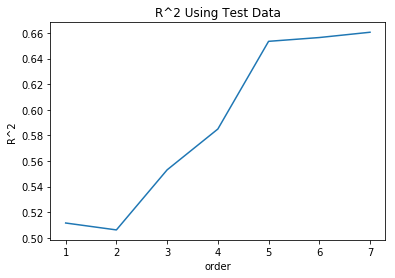

In [497]:
lr = LinearRegression()

Rsqu_test = []

order = [1, 2, 3, 4, 5, 6, 7]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['white']])
    
    x_test_pr = pr.fit_transform(x_test[['white']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0.5, 1.0, 'R^2 Using Test Data')

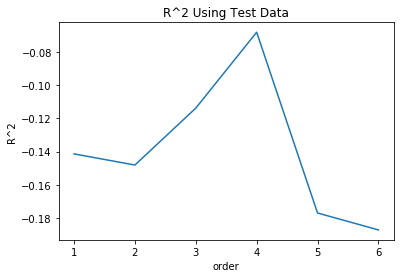

In [498]:
lr = LinearRegression()

Rsqu_test = []

order = [1, 2, 3, 4, 5, 6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['black']])
    
    x_test_pr = pr.fit_transform(x_test[['black']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0.5, 1.0, 'R^2 Using Test Data')

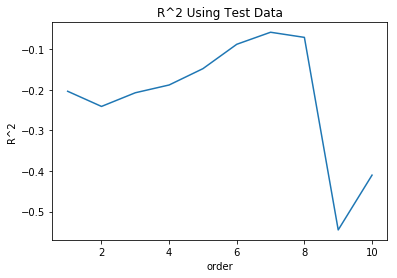

In [499]:
lr = LinearRegression()

Rsqu_test = []

order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['asian']])
    
    x_test_pr = pr.fit_transform(x_test[['asian']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0.5, 1.0, 'R^2 Using Test Data')

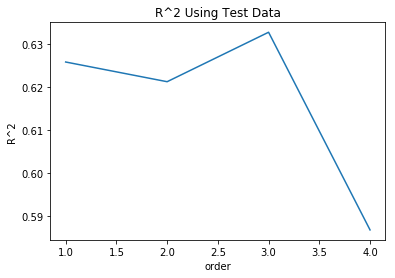

In [500]:
lr = LinearRegression()

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['latino']])
    
    x_test_pr = pr.fit_transform(x_test[['latino']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [501]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['white']])
x_test_pr = pr.fit_transform(x_test[['white']])
pr
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test))

0.5936368222660805
0.6534511837065046


In [502]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[['black']])
x_test_pr = pr.fit_transform(x_test[['black']])
pr
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test))

0.04877978737862576
-0.06824139891695014


In [507]:
pr = PolynomialFeatures(degree=6)
x_train_pr = pr.fit_transform(x_train[['asian']])
x_test_pr = pr.fit_transform(x_test[['asian']])
pr
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test))

0.4574808871344641
-0.08742299745006532


In [504]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['latino']])
x_test_pr = pr.fit_transform(x_test[['latino']])
pr
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test))

0.7931837578965325
0.6326951257449815


In [512]:
msk = np.random.rand(len(ethnicData)) < 0.8
train = ethnicData[msk]
test = ethnicData[~msk]

In [522]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['black','white','asian','latino']])
y = np.asanyarray(train[['confirmed_cases']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

y_hat= regr.predict(test[['black','white','asian','latino']])
x = np.asanyarray(test[['black','white','asian','latino']])
y = np.asanyarray(test[['confirmed_cases']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-0.0842115  -0.14754801 -0.17914387 -0.03710697]]
Intercept:  [16.07077674]
Residual sum of squares: 3.09
Variance score: 0.69


In [515]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['white','asian','latino']])
y = np.asanyarray(train[['confirmed_cases']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

y_hat= regr.predict(test[['white','asian','latino']])
x = np.asanyarray(test[['white','asian','latino']])
y = np.asanyarray(test[['confirmed_cases']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-0.06794331 -0.09991994  0.03988615]]
Residual sum of squares: 3.23
Variance score: 0.67


In [517]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['white','latino']])
y = np.asanyarray(train[['confirmed_cases']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

y_hat= regr.predict(test[['white','latino']])
x = np.asanyarray(test[['white','latino']])
y = np.asanyarray(test[['confirmed_cases']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[0.00653088 0.11753606]]
Residual sum of squares: 3.18
Variance score: 0.68


In [518]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['black','white','latino']])
y = np.asanyarray(train[['confirmed_cases']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

y_hat= regr.predict(test[['black','white','latino']])
x = np.asanyarray(test[['black','white','latino']])
y = np.asanyarray(test[['confirmed_cases']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[0.09999614 0.03093996 0.13585413]]
Residual sum of squares: 3.33
Variance score: 0.66


In [525]:
incomeEthnic = laIncome.merge(ethnicData, on='place')
incomeEthnic.head()

,place,Income,type_x,confirmed_cases_x,Long_x,Lat_x,white,asian,black,latino,type_y,confirmed_cases_y,Long_y,Lat_y
0,Maywood,41203,standalone-city,15,-118.187662,33.988520,2,0,0,96,standalone-city,15,-118.187662,33.988520
1,Cudahy,39048,standalone-city,14,-118.183118,33.963116,4,0,0,93,standalone-city,14,-118.183118,33.963116
2,Huntington Park,39185,standalone-city,14,-118.216706,33.979987,3,0,0,95,standalone-city,14,-118.216706,33.979987
3,Lynwood,48518,standalone-city,14,-118.201664,33.923954,2,1,13,82,standalone-city,14,-118.201664,33.923954
4,South Gate,48312,standalone-city,13,-118.192526,33.944713,5,0,0,92,standalone-city,13,-118.192526,33.944713


In [527]:
incomeEthnic = incomeEthnic.drop(columns = ['type_x', 'type_y', 'confirmed_cases_y', 'Long_x','Long_y','Lat_x','Lat_y'])
incomeEthnic = incomeEthnic.rename(columns = {'confirmed_cases_x':'cases'})
incomeEthnic.head()

,place,Income,cases,white,asian,black,latino
0,Maywood,41203,15,2,0,0,96
1,Cudahy,39048,14,4,0,0,93
2,Huntington Park,39185,14,3,0,0,95
3,Lynwood,48518,14,2,1,13,82
4,South Gate,48312,13,5,0,0,92


In [529]:
incomeEthnic['Income'] = incomeEthnic['Income'].div(1000) #normalize data

In [530]:
msk = np.random.rand(len(incomeEthnic)) < 0.8
trainData = incomeEthnic[msk]
testData = incomeEthnic[~msk]

,place,Income,cases,white,asian,black,latino
0,Maywood,41.203,15,2,0,0,96
1,Cudahy,39.048,14,4,0,0,93
2,Huntington Park,39.185,14,3,0,0,95
3,Lynwood,48.518,14,2,1,13,82
4,South Gate,48.312,13,5,0,0,92


In [533]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(trainData[['Income','black','white','asian','latino']])
y = np.asanyarray(trainData[['cases']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

y_hat= regr.predict(testData[['Income','black','white','asian','latino']])
x = np.asanyarray(testData[['Income','black','white','asian','latino']])
y = np.asanyarray(testData[['cases']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-0.01355857 -0.0258477  -0.05244206 -0.09024873  0.03514099]]
Intercept:  [9.17078409]
Residual sum of squares: 2.72
Variance score: 0.86
